In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Deep Learning Libraries

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
folder_path1 = "/kaggle/input/face-expression-recognition-dataset/images"
folder_path2 = "/kaggle/input/affectnet-training-data"
folder_path3 = "/kaggle/input/fer2013"

In [4]:
batch_size  = 128
picture_size = 48
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set1 = datagen_train.flow_from_directory(folder_path1+"/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 28821 images belonging to 7 classes.


In [5]:
test_set1 = datagen_val.flow_from_directory(folder_path1+"/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 7066 images belonging to 7 classes.


In [35]:
train_set2 = datagen_train.flow_from_directory(folder_path2,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              classes = ['anger', 'digust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
                                              shuffle=True)

Found 23694 images belonging to 7 classes.


In [7]:
from keras.optimizers import Adam,SGD,RMSprop

In [8]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
history = model.fit_generator(generator=train_set1,
                                steps_per_epoch=train_set1.n//train_set1.batch_size,
                                epochs=epochs,
                                validation_data = test_set1,
                                validation_steps = test_set1.n//test_set1.batch_size,
                                callbacks=callbacks_list
                                )

/tmp/ipykernel_32/3281133041.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set1,


Epoch 1/48



KeyboardInterrupt



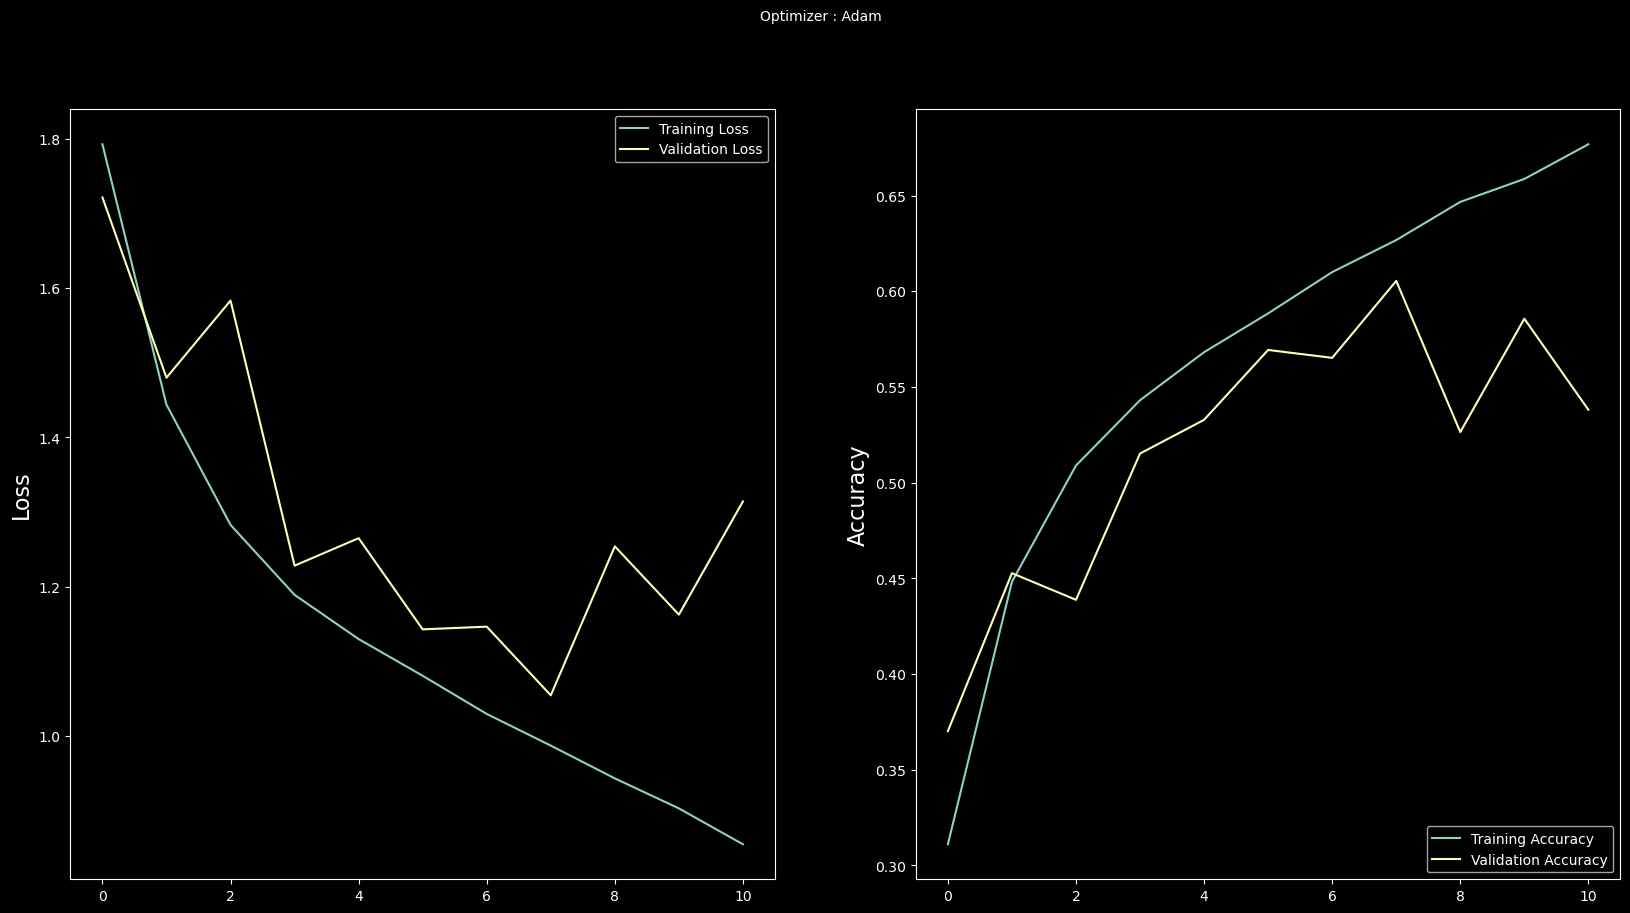

In [20]:

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [18]:
model.save("model.h5")


# Training on affectnet-training-data

In [35]:
LABELS = set()
paths = []
for d in os.listdir(folder_path2):
    if d == 'labels.csv' or d == 'contempt':
        continue
    paths.append((folder_path2+"/"+d, d))
    LABELS.add(d)
    

In [36]:
paths

[('/kaggle/input/affectnet-training-data/surprise', 'surprise'),
 ('/kaggle/input/affectnet-training-data/fear', 'fear'),
 ('/kaggle/input/affectnet-training-data/neutral', 'neutral'),
 ('/kaggle/input/affectnet-training-data/sad', 'sad'),
 ('/kaggle/input/affectnet-training-data/disgust', 'disgust'),
 ('/kaggle/input/affectnet-training-data/happy', 'happy'),
 ('/kaggle/input/affectnet-training-data/anger', 'anger')]

In [37]:
import cv2
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (48,48))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [41]:
X = []
y = []
for path, label in paths:
    for image_path in os.listdir(path):
        image = load_and_preprocess_image(path+"/"+image_path)
        
        X.append(image)
        if label == 'anger':
            label = 'angry'
        y.append(label)

In [43]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
 
X = np.array(X)

y = encoder.fit_transform(np.array(y))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from keras.models import load_model
model = load_model('/kaggle/input/model/model.h5')
# output_layer = Dense(8, activation='softmax')(model.layers[-2].output)
# new_model = Model(inputs=model.input, outputs=output_layer)
# opt = Adam(lr = 0.0001)
# new_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
h = model.fit(X_train, y_train, batch_size=128, epochs=48, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/48
144/144 [==============================] - 363s 3s/step - loss: 1.2455 - accuracy: 0.5379 - val_loss: 0.9881 - val_accuracy: 0.6072 - lr: 2.0000e-04
Epoch 2/48
144/144 [==============================] - 361s 3s/step - loss: 0.9780 - accuracy: 0.6125 - val_loss: 0.9137 - val_accuracy: 0.6414 - lr: 2.0000e-04
Epoch 3/48
144/144 [==============================] - 360s 3s/step - loss: 0.9189 - accuracy: 0.6370 - val_loss: 0.8955 - val_accuracy: 0.6535 - lr: 2.0000e-04
Epoch 4/48
144/144 [==============================] - 372s 3s/step - loss: 0.8802 - accuracy: 0.6530 - val_loss: 0.8653 - val_accuracy: 0.6634 - lr: 2.0000e-04
Epoch 5/48
144/144 [==============================] - 370s 3s/step - loss: 0.8459 - accuracy: 0.6685 - val_loss: 0.8393 - val_accuracy: 0.6726 - lr: 2.0000e-04
Epoch 6/48
144/144 [==============================] - 370s 3s/step - loss: 0.8236 - accuracy: 0.6744 - val_loss: 0.8440 - val_accuracy: 0.6751 - lr: 2.0000e-04
Epoch 7/48
144/144 [====================

In [47]:
model.save("model2.h5")

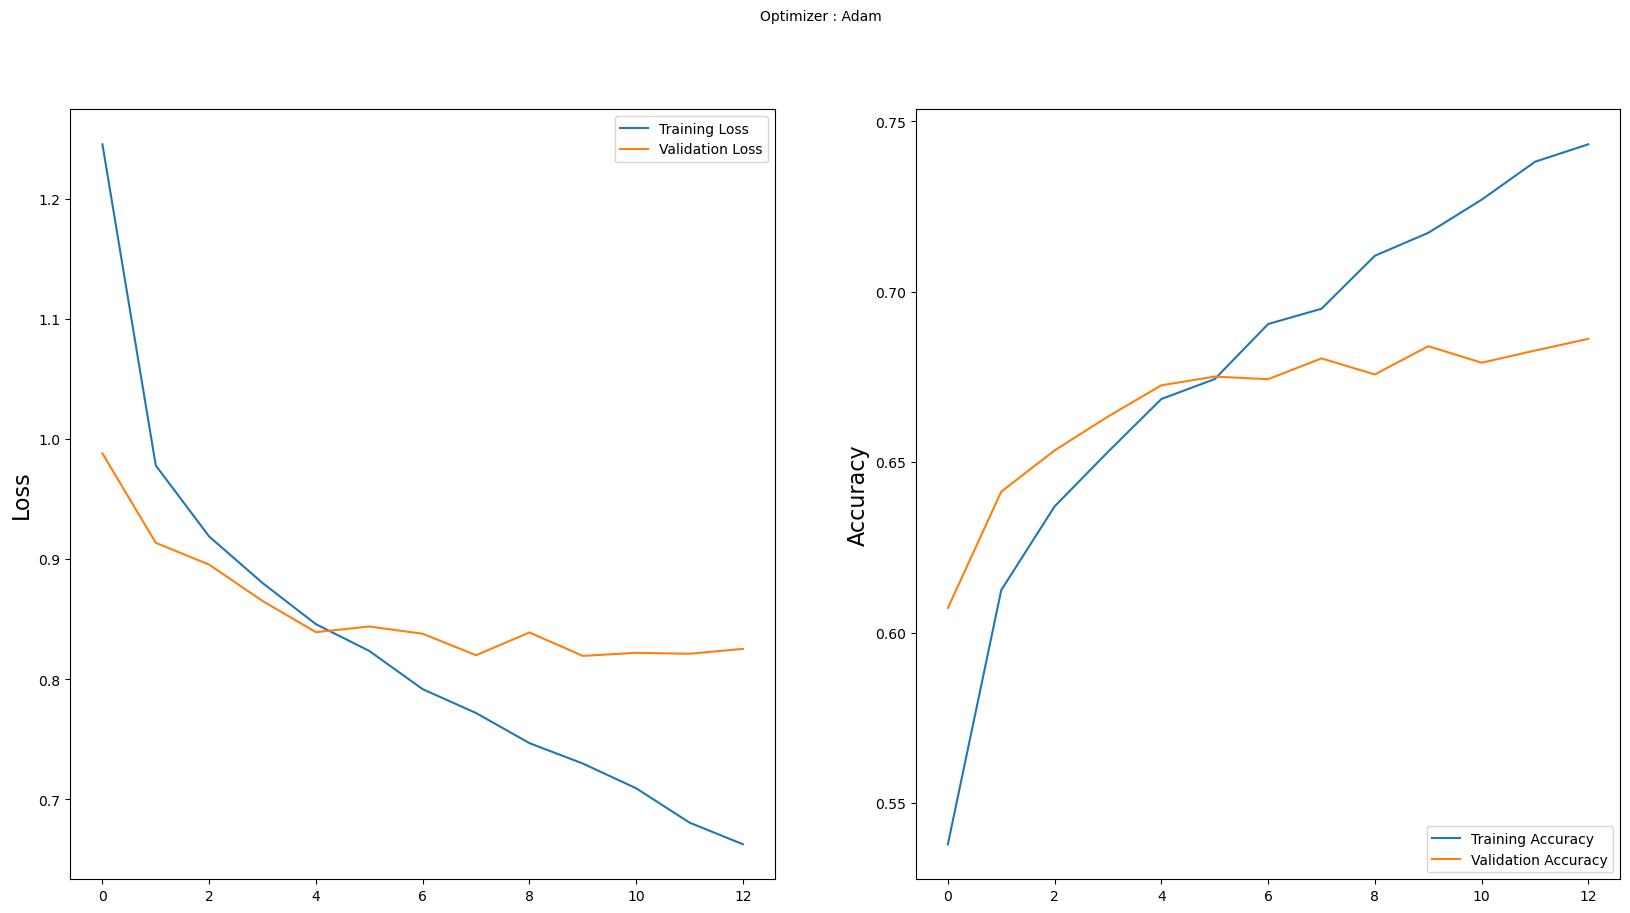

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Training on fer2013

In [4]:
from keras.models import load_model
model = load_model('/kaggle/input/model2/model2.h5')

In [5]:
batch_size  = 128
picture_size = 48
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set3 = datagen_train.flow_from_directory(folder_path3+"/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 28709 images belonging to 7 classes.


In [6]:
test_set3 = datagen_train.flow_from_directory(folder_path3+"/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 7178 images belonging to 7 classes.


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_set3,
                                steps_per_epoch=train_set3.n//train_set3.batch_size,
                                epochs=epochs,
                                validation_data = test_set3,
                                validation_steps = test_set3.n//test_set3.batch_size,
                                callbacks=callbacks_list
                                )

/tmp/ipykernel_32/3029097555.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set3,


Epoch 1/48
224/224 [==============================] - 585s 3s/step - loss: 1.0503 - accuracy: 0.6078 - val_loss: 1.0388 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 2/48
224/224 [==============================] - 562s 3s/step - loss: 0.9526 - accuracy: 0.6436 - val_loss: 0.9336 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 3/48
224/224 [==============================] - 564s 3s/step - loss: 0.9036 - accuracy: 0.6596 - val_loss: 1.1365 - val_accuracy: 0.5753 - lr: 0.0010
Epoch 4/48
224/224 [==============================] - 570s 3s/step - loss: 0.8525 - accuracy: 0.6774 - val_loss: 0.9667 - val_accuracy: 0.6422 - lr: 0.0010
Epoch 5/48
224/224 [==============================] - ETA: 0s - loss: 0.7964 - accuracy: 0.7016Restoring model weights from the end of the best epoch: 2.

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 584s 3s/step - loss: 0.7964 - accuracy: 0.7016 - val_loss: 1.2176 - val_accuracy: 0.5891 - lr: 0.0010

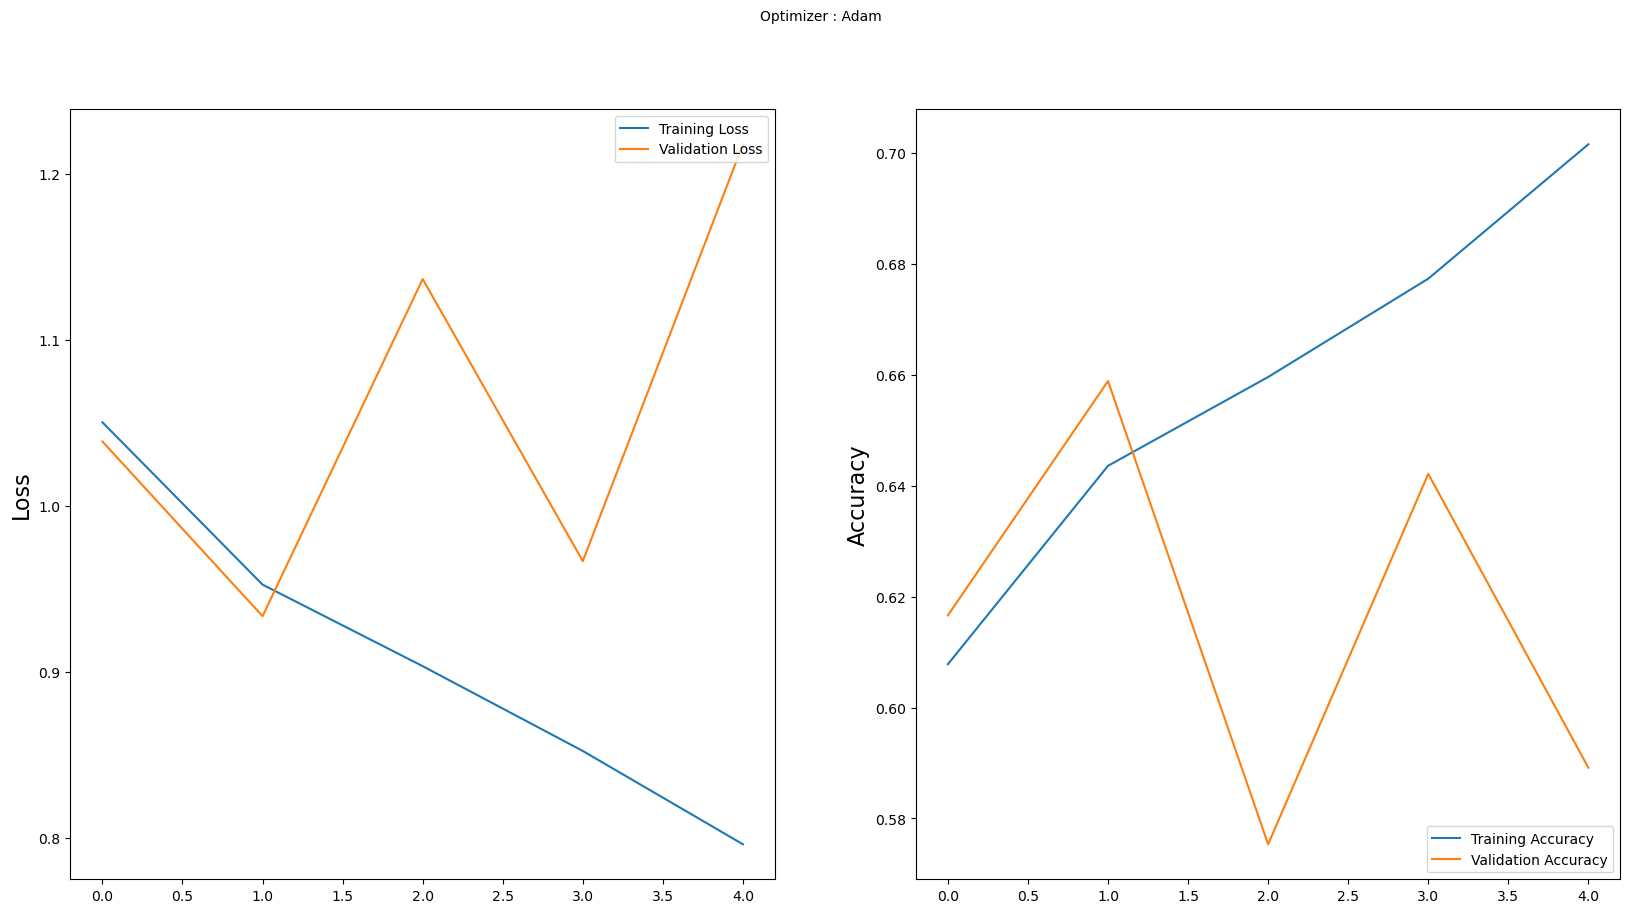

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [12]:
model.save('model3.h5')